In [32]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, RepeatVector, Dense, Dot, Concatenate, Softmax
from tensorflow.keras.layers import Embedding
import numpy as np
from matplotlib import pyplot as plt

In [4]:
tweets = pd.read_csv("./labeled_data.csv")
sample = tweets.sample(10)

In [5]:
def find_user(tweet):
    match = re.search(r"@(\w+)", tweet)
    if match:
        return match.group(1)
    return None
tweets["user"] = tweets["tweet"].apply(find_user)
tweets = tweets[["class", "tweet", "user"]]

In [6]:
tweets

,class,tweet,user
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,mayasolovely
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,mleew17
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,UrKindOfBrand
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,C_G_Anderson
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,ShenikaRoberts
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,LifeAsKing
24779,2,"you've gone and broke the wrong heart baby, an...",None
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,None
24781,1,youu got wild bitches tellin you lies,None


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
 2   user    14189 non-null  object
dtypes: int64(1), object(2)
memory usage: 581.0+ KB


In [8]:
def tweet_to_user(tweet):
    return tweets[tweets["tweet"] == tweet]["user"].values[0]
tweet_to_user(tweets.iloc[123]["tweet"])

'Frosstyy_'

In [9]:
class Preprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stopwords = set(stopwords.words("english"))

    def remove_username(self, tweet):
        return re.sub(r"@(\w+)", "", tweet)
    
    def remove_punctuations(self, tweet):
        puncs = [".", ",", "!", "?", ":", ";", "-", "_", "(", ")", "[", "]", "{", "}", "<", ">", "/", "\\", "|", "@", "#", "$", "%", "^", "&", "*", "+", "=", "~", "`", "RT"]
        for punc in puncs:
            tweet = tweet.replace(punc, "")
        return tweet

    def remove_stopwords(self, tweet):
        stop_words = set(stopwords.words('english'))
    
        filtered_tweets = [t for t in tweet.split(" ") if t.lower() not in stop_words]
        filtered_tweets = " ".join(filtered_tweets).strip()
        return filtered_tweets
    
    def lemmatize(self, tweet):
        lemmatizer = WordNetLemmatizer()
        lemmatized = [lemmatizer.lemmatize(t) for t in tweet.split(" ")]
        lemmatized = " ".join(lemmatized)
        return lemmatized

In [10]:
preprocessor = Preprocessor()

tweets["tweet"] = tweets["tweet"].fillna("").astype(str)
tweets["tweet"] = tweets["tweet"].apply(preprocessor.remove_username)
tweets["tweet"] = tweets["tweet"].apply(preprocessor.remove_punctuations)
tweets["tweet"] = tweets["tweet"].apply(preprocessor.remove_stopwords)
tweets["tweet"] = tweets["tweet"].apply(preprocessor.lemmatize)

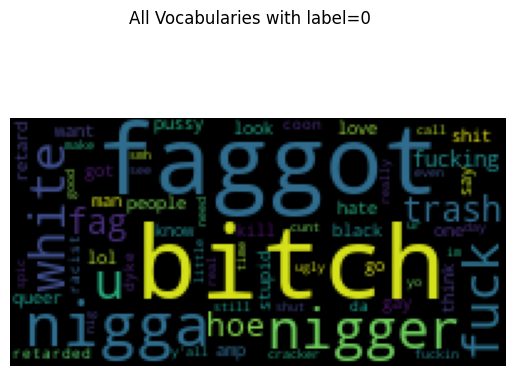

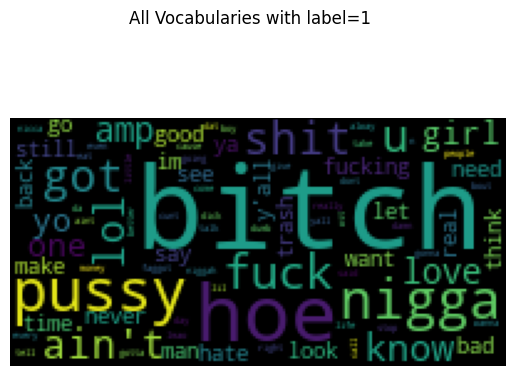

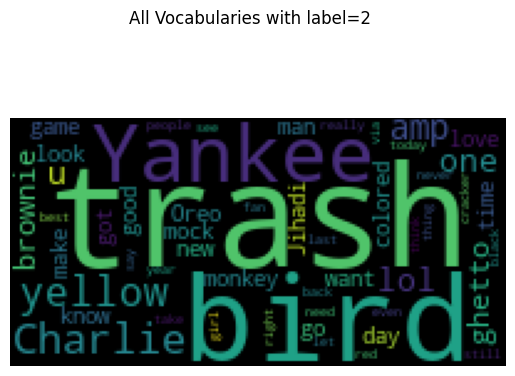

In [41]:
# Word Cloud 
from wordcloud import WordCloud
def plot_all_words(label):
    texts = tweets.copy()
    texts = texts[texts["class"] == label]

    all_vocab = " ".join(texts["tweet"])

    wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(all_vocab)
    
    plt.imshow(wc)
    plt.suptitle(f"All Vocabularies with label={label}")
    plt.axis('off')
    plt.show()

    return ""

for i in range(0,3):
    print(plot_all_words(i))

In [11]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweets["tweet"])
word_index = tokenizer.word_index # Lists all tokenized words
print(word_index)

X = tokenizer.texts_to_sequences(tweets["tweet"])

X = pad_sequences(X, padding='post', maxlen=25)

{'bitch': 1, 'hoe': 2, 'like': 3, 'pussy': 4, 'nigga': 5, "i'm": 6, '8220': 7, 'get': 8, 'as': 9, 'fuck': 10, 'u': 11, 'got': 12, 'shit': 13, 'trash': 14, 'lol': 15, "ain't": 16, 'know': 17, 'amp': 18, 'one': 19, 'love': 20, 'go': 21, 'want': 22, 'girl': 23, 'fucking': 24, 'yo': 25, 'make': 26, 'bird': 27, 'look': 28, 'say': 29, 'bad': 30, "can't": 31, 'man': 32, 'good': 33, 'need': 34, 'faggot': 35, 'think': 36, 'time': 37, 'hate': 38, 'still': 39, 'see': 40, 'ya': 41, "that's": 42, 'im': 43, 'back': 44, 'never': 45, 'day': 46, 'really': 47, 'people': 48, "y'all": 49, 'real': 50, 'right': 51, 'even': 52, 'white': 53, 'would': 54, 'said': 55, 'come': 56, 'lmao': 57, 'let': 58, 'call': 59, 'dick': 60, 'wit': 61, 'wanna': 62, 'tell': 63, 'talk': 64, 'bout': 65, 'take': 66, 'stop': 67, 'little': 68, 'damn': 69, 'life': 70, 'da': 71, 'nigger': 72, '128514': 73, 'gotta': 74, 'dat': 75, 'dont': 76, 'new': 77, 'cause': 78, 'gonna': 79, 'cunt': 80, 'every': 81, 'always': 82, 'charlie': 83, 'gi

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X,y = smote.fit_resample(X, tweets["class"])

sorted(Counter(y).items())

[(0, 19190), (1, 19190), (2, 19190)]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Many-To-One LSTM Architecture

def many_to_one_lstm(input_size, output_size, dropout_rate):
    
    input = Input(shape=(input_size,), dtype='int32')
    embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=output_size)(input)

    y = LSTM(128, return_sequences=True)(embedding)   
    y = Dropout(dropout_rate)(y)
    y = LSTM(128, return_sequences=True)(y)
    y = Dropout(dropout_rate)(y)
    y = LSTM(64, return_sequences=False)(y)

    y = Dense(3, activation='softmax')(y)

    model = Model(inputs=input, outputs=y)

    return model

In [15]:
mto_lstm = many_to_one_lstm(input_size=25, output_size=50, dropout_rate=0.5)
mto_lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 50)         │     1,381,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 25, 128)        │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,653,935 (6.31 MB)

 Trainable params: 1,653,935 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
mto_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

mto_lstm.fit(X_train, y_train, epochs=5, batch_size=32, shuffle=True)

Epoch 1/5
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.5678 - loss: 0.8691
Epoch 2/5
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.6908 - loss: 0.7219
Epoch 3/5
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.7396 - loss: 0.6358
Epoch 4/5
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.7753 - loss: 0.5540
Epoch 5/5
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.8148 - loss: 0.4746


In [17]:
# This script is a 'simulation' of prediction on real-time data (only using the raw data here, since we didn't allocate seperate real-time data).

i = np.random.randint(0, tweets.shape[0])

random_sentence = pad_sequences(
    tokenizer.texts_to_sequences([tweets["tweet"].iloc[i]]),
    padding='post', maxlen=25
)
pred = mto_lstm.predict(random_sentence)
print(tweet_to_user(tweets["tweet"].iloc[i]), f"says: '{tweets['tweet'].iloc[i]}'.")
print("Prediction: ", np.argmax(pred, axis=1)[0])
print("True Label: ", tweets["class"].iloc[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
None says: 'Aerin told leave lightskin boy alone Shit bitch 9995128514'.
Prediction:  1
True Label:  1


In [18]:
loss, acc = mto_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6744 - loss: 0.8016
Test Accuracy: 0.677088737487793


# Attention Model

In [19]:
repeator = RepeatVector(25)
concatenator = Concatenate(axis=-1)
densor1 = Dense(128, activation = "tanh")
densor2 = Dense(1, activation = "relu")
activator = Softmax(axis=1, name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor = Dot(axes = 1)

In [20]:
def context_layer(lstm_prev, hidden_state):
    
    r = repeator(hidden_state)

    concat = concatenator([lstm_prev, r])

    e = densor1(concat)

    e2 = densor2(e)

    alphas = activator(e2)

    context =  dotor([alphas, lstm_prev])

    return context

In [21]:
from tensorflow.keras.layers import Bidirectional

def attention_model(Tx, Ty, emb_dim):

    x = Input(shape=(Tx,))

    embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=emb_dim)(x)
    
    hidden_state = Input(shape=(128, ))
    cell_state = Input(shape=(128, ))

    s = hidden_state
    c = cell_state

    a = Bidirectional(LSTM(128, return_sequences=True))(embedding)
    
    res = []

    for _ in range(Tx):
        
        context = context_layer(a, s)

        _, h, c = LSTM(128, return_sequences=False, return_state=True)(
            context, initial_state=[s, c]
        )

        output = Dense(3, activation='softmax')(h)
        res.append(output)
    
    output = res[-1]

    
    model = Model(inputs=[x, hidden_state, cell_state], outputs=output)

    return model

In [22]:
m = attention_model(25, 1, 50) 
m.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 25, 50)    │  1,381,100 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 25, 256)   │    183,296 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 25, 128)   │          0 │ input_layer_2[0]… │
│ (RepeatVector)      │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 25, 384)   │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ repeat_vector[0]… │
│                     │                   │            │ bidirectional[0]… │
│                     │                   │            │ repeat_vector[1]… │
│                     │                   │            │ bidirectional[0]… │
│                     │                   │            │ repeat_vector[2]… │
│                     │                   │            │ bidirectional[0]… │
│                     │                   │            │ repeat_vector[3]… │
│                     │                   │            │ bidirectional[0]… │
│                     │                   │            │ repeat_vector[4]… │
│                     │                   │            │ bidirectional[0]

 Total params: 6,542,192 (24.96 MB)

 Trainable params: 6,542,192 (24.96 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:

model = attention_model(X_train.shape[1], 1, 50)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

h0 = np.zeros((X_train.shape[0],128))
c0 = np.zeros((X_train.shape[0], 128)) # - training size x 128

model.fit([X_train, h0, c0], y_train, epochs=5, batch_size=100)

Epoch 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 184s 245ms/step - accuracy: 0.5505 - loss: 0.8894
Epoch 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 114s 247ms/step - accuracy: 0.6917 - loss: 0.6953
Epoch 3/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 112s 244ms/step - accuracy: 0.7430 - loss: 0.5924
Epoch 4/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 123s 266ms/step - accuracy: 0.7830 - loss: 0.5094
Epoch 5/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 121s 262ms/step - accuracy: 0.8128 - loss: 0.4483


In [24]:
# Testing
h_test = np.zeros((X_test.shape[0], 128))
c_test = np.zeros((X_test.shape[0], 128))

loss, acc = model.evaluate([X_test, h_test, c_test], y_test)
print("Test Accuracy: ", acc)

360/360 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.6676 - loss: 0.8374
Test Accuracy:  0.6632794737815857


In [31]:
# Testing with Examples

h00 = np.zeros((1, 128))
c00 = np.zeros((1, 128))

comments = [
    "fucking garbage nigga",
    "this is so cool",
    "Holy shit so bad!!",
    "Hi hello thank you for your understanding I love you",
    "gayboy little bitch i swear",
    "thank you so much for this!",
    "hi hello i love you",
    "i hate you"
]

for comment in comments:
    comment = tokenizer.texts_to_sequences([comment])
    comment = pad_sequences(comment, padding='post', maxlen=25)

    pred = model.predict([comment, h00, c00])
    print(np.argmax(pred, axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0]


## Todos!

- Creating a pre-trained embedding vector using GloVe to further capture vocabulary patterns.
- Testing a Transformer Network
- Add EarlyStopping / Regularization to the attention model
- Add proper Documentation